In [12]:
import os
import shutil
import nibabel as nib
import torch
import nilearn as nil
import scipy.ndimage as ndi
import numpy as np
from PIL import Image

In [12]:
# for p_id in os.listdir('datasets/files'):
#     shutil.move(os.path.join('datasets/files', p_id), os.path.join('datasets/files', f"patient{p_id}"))

In [ ]:
for files in os.listdir('datasets/files'):
    print(files)
    if len(files.split('-'))==2:
        patient_id, image_type = files.split('-')
        markup_file = '-'.join([patient_id, 'LesionSeg', image_type])
        pat_path = os.path.join(f'datasets/files/{patient_id}')
        # os.makedirs(pat_path, exist_ok=True)
        # print(pat_path)
        # shutil.copy(os.path.join('datasets/files', files), pat_path)
        # shutil.move(os.path.join('datasets/files', markup_file), pat_path)

In [2]:
def read_nii_files():
    im_type = 'T2'
    new_dataset_path = f'/mnt/mddp/etrofimenko/segmentation/datasets/files'
    images_nii = []
    masks_nii = []
    for p, d, f in os.walk(new_dataset_path):
        if d == []:
            *_, patient_id = p.split('/')
            for file in f:
                if im_type in file and 'Lesion' not in file:
                    images_nii.append(os.path.join(p, file))
                elif im_type in file and 'Lesion' in file:
                    masks_nii.append(os.path.join(p, file))
    print(images_nii)
    print(masks_nii)
read_nii_files()

['/mnt/mddp/etrofimenko/segmentation/datasets/files/patient47/47-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient12/12-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient19/19-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient34/34-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient22/22-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient9/9-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient45/45-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient5/5-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient28/28-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient48/48-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient3/3-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient46/46-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient37/37-T2.nii', '/mnt/mddp/etrofimenko/segmentation/datasets/files/patie

In [60]:
path  = '/mnt/mddp/etrofimenko/segmentation/datasets/files/patient47/47-Flair.nii'
brain_vol = nib.load(path)
brain_vol_data_torch = torch.from_numpy(brain_vol.get_fdata())
brain_vol_data_torch = brain_vol_data_torch.permute(2, 0, 1)
    

In [62]:
brain_vol_data_torch.numpy()[0].shape

(256, 256)

In [30]:
from skimage.io import imread

In [120]:
import numpy as np
mm  = np.array([brain_vol_data_torch.numpy()[0]])

In [87]:
mm_float = mm / 1000


(1, 256, 256)

In [126]:
mm = mm / 1000 
mm = mm * 255
mm.shape

(1, 256, 256)

In [125]:
mm[mm < np.max(mm) * 0.1] = 0

In [111]:
def process_nii_file(path):
    brain_vol = nib.load(path)
    brain_vol_data_torch = torch.from_numpy(brain_vol.get_fdata())
    brain_vol_data_torch = brain_vol_data_torch.permute(2, 0, 1)
    slices = []
    # print(brain_vol_data_torch.shape)
    for ind in range(len(brain_vol_data_torch)):
        slice_ = brain_vol_data_torch[ind].numpy()
        slice_ = torch.from_numpy(np.array([slice_]))
        slice_ = slice_.permute(1,2,0).numpy()
        # print(slicek_.shape)
        slices.append(slice_)    
    return slices


def read_nii_files():
    im_type = 'T2'
    new_dataset_path = '/mnt/mddp/etrofimenko/segmentation/datasets/files'
    images_nii = []
    masks_nii = []
    for p, d, f in os.walk(new_dataset_path):
        if d == []:
            *_, patient_id = p.split('/')
            for file in f:
                if im_type in file and 'Lesion' not in file:
                    images_nii.append(os.path.join(p, file))
                elif im_type in file and 'Lesion' in file:
                    masks_nii.append(os.path.join(p, file))
    
    
    # print(images_nii[0])
    volumes = {}
    masks = {}
    for index in range(len(images_nii)):
        if index == 1:
            break
        image_nii = images_nii[index]
        mask_nii = masks_nii[index]
        patient_id = image_nii.split('/')[-2]
        
        volumes[patient_id] = process_nii_file(image_nii)
        masks[patient_id] = process_nii_file(image_nii)
        
    
read_nii_files()

In [5]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi



def process_nii_file(path, image = True):
    brain_vol = nib.load(path)
    brain_vol_data_torch = torch.from_numpy(brain_vol.get_fdata())
    brain_vol_data_torch = brain_vol_data_torch.permute(2, 0, 1)
    slices = []
    # print(brain_vol_data_torch.shape)
    for ind in range(len(brain_vol_data_torch)):
        slice_ = brain_vol_data_torch[ind].numpy()
        if image:
            slice_ = np.array([slice_])
            slice_ = torch.from_numpy(slice_)
            slice_ = slice_.permute(1,2,0).numpy()
            slice_ = slice_ / slice_.max() 

            
        # print(slicek_.shape)
        
        slice_ = slice_ * 255
        slices.append(slice_.astype('uint8'))    
    return np.array(slices)


def read_nii_files():
    im_type = 'T2'
    new_dataset_path = '/mnt/mddp/etrofimenko/segmentation/datasets/files'
    images_nii = []
    masks_nii = []
    for p, d, f in os.walk(new_dataset_path):
        if d == []:
            *_, patient_id = p.split('/')
            for file in f:
                if im_type in file and 'Lesion' not in file:
                    images_nii.append(os.path.join(p, file))
                elif im_type in file and 'Lesion' in file:
                    masks_nii.append(os.path.join(p, file))
    
    
    # print(images_nii[0])
    volumes = {}
    masks = {}
    for index in range(len(images_nii)):
        # if index == 1:
        #     break
        image_nii = images_nii[index]
        mask_nii = masks_nii[index]
        patient_id = image_nii.split('/')[-2]
        
        volumes[patient_id] = process_nii_file(image_nii)
        masks[patient_id] = process_nii_file(mask_nii, False)
        
    return volumes, masks
        
        
volumes, masks = read_nii_files()

In [129]:
import json

In [8]:
ttt = volumes['patient47'][0]

In [161]:
# torch.from_numpy(ttt)
# slice_ = torch.from_numpy(ttt).permute(2, 0, 1).numpy()
ttt.shape

(256, 256, 1)

In [14]:
for ind in volumes:
    dst = os.path.join('datasets/files_T2_jpg', ind)
    os.makedirs(dst, exist_ok=True)
    
    for i, volume in enumerate(volumes[ind]):
        print(volume.shape)
        im = Image.fromarray(np.squeeze(volume, axis=2) )
        im_mask = Image.fromarray(masks[ind][i])
        
        im.save(os.path.join(dst, f'T2_{i}.jpg'))
        im_mask.save(os.path.join(dst, f'T2_mask_{i}.jpg'))


(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 

In [164]:
from PIL import Image
im = Image.fromarray(np.squeeze(ttt, axis=2) )
im.save("file.jpg")

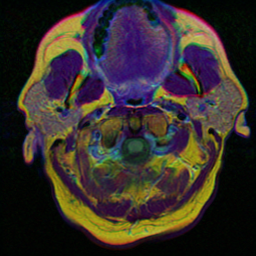

In [75]:
test = "test/TCGA_CS_4941_19960909_2.tif"
from PIL import Image
im = Image.open(test)
im.show()

In [82]:
imarray = np.array(im)
imarray.shape

(256, 256, 3)

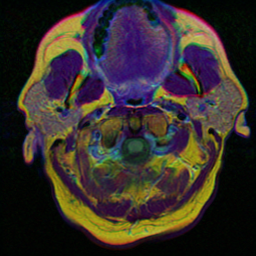

In [74]:
brain_vol.

985.0

In [71]:
import matplotlib
matplotlib.image.imsave('name.tif', mm)

ValueError: third dimension must be 3 or 4

In [65]:
from PIL import Image
im = Image.fromarray(mm)


TypeError: Cannot handle this data type: (1, 1, 256), <f8